# To build a model for AlexNet Convolution neural network:


In [1]:
import tensorflow as tf
import tensorflow.keras.backend as K

In [2]:
from tensorflow.keras.models import Model

In [3]:
from tensorflow.keras.models import Sequential

In [4]:
from tensorflow.keras.layers import Input

In [5]:
from tensorflow.keras.layers import Dense

In [6]:
from tensorflow.keras.layers import Flatten

In [7]:
from tensorflow.keras.layers import Conv2D

In [8]:
from tensorflow.keras.layers import MaxPooling2D

In [9]:
from tensorflow.keras.layers import Dropout

In [10]:
from tensorflow.keras.layers import LeakyReLU

In [11]:
from tensorflow.keras.layers import Activation

In [12]:
from tensorflow.keras.optimizers import Adam

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [15]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
model = Sequential()
# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(256))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# 2nd Fully Connected Layer
model.add(Dense(96))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# 3rd Fully Connected Layer
model.add(Dense(32))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Output Layer
model.add(Dense(3))
model.add(Activation('softmax'))
model.summary()

# Compile the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy','Precision','Recall','TruePositives','TrueNegatives','FalsePositives','FalseNegatives'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
activation (Activation)      (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
flatten (Flatten)            (None, 69984)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               17916160  
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0

In [ ]:
print("-----Program for Student Information-----")
 
D = dict()
 
n = int(input('How many student record you want to store?? '))
 
# Add student information
# to the dictionary
for i in range(0,n):
    x, y = input("Enter the complete name (First and last name) of student: ").split()
    z = input("Enter contact number: ")
    m = input('Enter Marks: ')
    D[x, y] = (z, m)
     
# define a function for shorting
# names based on first name
def sort():
    ls = list()
    # fetch key and value using
    # items() method
    for sname,details in D.items():
       
        # store key parts as an tuple
        tup = (sname[0],sname[1])
         
        # add tuple to the list
        ls.append(tup)   
         
    # sort the final list of tuples
    ls = sorted(ls)   
    for i in ls:
       
        # print first name and second name
        print(i[0],i[1])
    return
   
# define a function for
# finding the minimum marks
# in stored data
def minmarks():
    ls = list()
    # fetch key and value using
    # items() methods
    for sname,details in D.items():
        # add details second element
        # (marks) to the list
        ls.append(details[1])   
     
    # sort the list elemnts   
    ls = sorted(ls)   
    print("Minimum marks: ", min(ls))
     
    return
   
# define a function for searching
# student contact number
def searchdetail(fname):
    ls = list()
     
    for sname,details in D.items():
       
        tup=(sname,details)
        ls.append(tup)
         
    for i in ls:
        if i[0][0] == fname:
            print(i[1][0])
    returns 
    
   
# define a function for
# asking the options
def option():
   
    choice = int(input('Enter the operation detail: \n \
    1: Sorting using first name \n \
    2: Finding Minimum marks \n \
    3: Search contact number using first name: \n \
    4: Exit\n \
    Option: '))
     
    if choice == 1:
        # function call
        sort()
        print('Want to perform some other operation??? Y or N: ')
        inp = input()
        if inp == 'Y':
            option()
             
        # exit function call   
        exit()
         
    elif choice == 2:
        minmarks()
        print('Want to perform some other operation??? Y or N: ')
         
        inp = input()
        if inp == 'Y':
            option()
        exit()
         
    elif choice == 3:
        first = input('Enter first name of student: ')
        searchdetail(first)
         
        print('Want to perform some other operation??? Y or N: ')
        inp = input()
        if inp == 'Y':
            option()
             
        exit()
    else:
        print('Thanks for executing me!!!!')
        exit()
         
option()

In [10]:
myList = ['abc']
lookup = ['abc 123 gfh', 'efg 456', 'ijk 789']


def checkIfinLookup(mylist, lookup):
    for x in mylist:
        n = next((s for s in lookup if x in s),None)
        if n is not None:
            return n

checkIfinLookup(myList, lookup)

'abc 123 gfh'

In [19]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [20]:
training_set=train_datagen.flow_from_directory('Data/train',target_size=(224,224),batch_size=32,class_mode='categorical')
test_set=test_datagen.flow_from_directory('Data/test',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 1449 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [21]:
img_dims = 150
epochs = 2
batch_size = 1

In [22]:
#### Fitting the model
history = model.fit(
           training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size)

Epoch 1/2
1449/1449 [==============================] - 88s 59ms/step - loss: 1.2047 - accuracy: 0.3797 - precision: 0.3467 - recall: 0.0270 - true_positives: 37.6177 - true_negatives: 2781.8309 - false_positives: 70.7088 - false_negatives: 1388.6522 - val_loss: 1.0250 - val_accuracy: 0.3486 - val_precision: 0.6286 - val_recall: 0.0683 - val_true_positives: 88.0000 - val_true_negatives: 2524.0000 - val_false_positives: 52.0000 - val_false_negatives: 1200.0000


In [29]:
import matplotlib.pyplot as plt

In [24]:
def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()


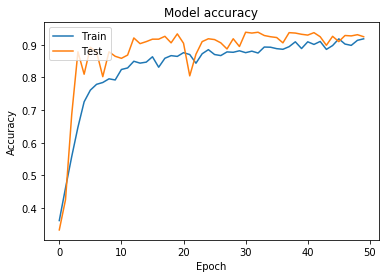

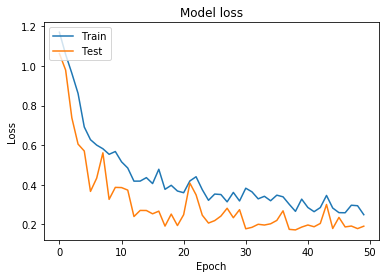

In [25]:
graph()

In [26]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(test_set)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
  ...
    to  
  ['...']
41/41 [==============================] - 33s 806ms/step - loss: 0.2190 - accuracy: 0.9123 - AUC: 0.9858 - Precision: 0.9196 - Recall: 0.9053 - TruePositives: 1166.0000 - TrueNegatives: 2474.0000 - FalsePositives: 102.0000 - FalseNegatives: 122.0000
Test Accuracy: 91.22670888900757


In [27]:
precision=scores[3]
recall=scores[3]
true_positives=scores[5]
true_negatives=scores[6]
false_positives=scores[7]
false_negatives=scores[8]

In [28]:
confution_matrix=[[true_positives,false_positives],[false_negatives,true_negatives]]

In [29]:
print(f"Accuracy                     : {scores[1]*100}")
print("")
print("Confution Matrix             : ",confution_matrix)
print("")
print("precision Score              : ",precision)
print("")
print("Recall or Sensitivity Score  : ",recall)
print("")
f1=(precision*recall)/(precision+recall)
F1_Score=2*f1
print("F1 Score                     : ",F1_Score)
print("")
Specifisity=true_negatives/true_negatives+false_positives
print("Specifisity Score            : ",Specifisity)

Accuracy                     : 91.22670888900757

Confution Matrix             :  [[1166.0, 102.0], [122.0, 2474.0]]

precision Score              :  0.91955835

Recall or Sensitivity Score  :  0.91955835

F1 Score                     :  0.9195583462715149

Specifisity Score            :  103.0


In [30]:
import h5py

In [31]:
model.save('covid.h5')

In [32]:
import tensorflow as tf
from tensorflow.keras.models import load_model

In [33]:
classifierLoad=tf.keras.models.load_model('covid.h5')

In [34]:
import numpy as np

In [40]:
from tensorflow.keras.preprocessing import image
test_image=image.load_img('c.jpg',target_size=(224,224))

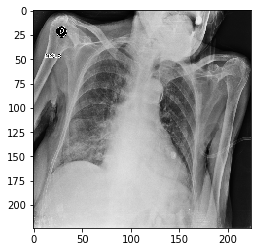

In [41]:
import matplotlib.pyplot as plt
img = plt.imshow(test_image)

In [42]:
test_image=image.img_to_array(test_image)

In [43]:
test_image=np.expand_dims(test_image,axis=0)

In [44]:
result=classifierLoad.predict(test_image)

In [45]:
prediction = result[0]

In [46]:
classes=training_set.class_indices

In [47]:
classes

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

In [48]:
prediction=list(prediction)

In [49]:
prediction

[1.0, 0.0, 0.0]

In [50]:
classes=['COVID19', 'NORMAL', 'PNEUMONIA']

In [51]:
output=zip(classes,prediction)

In [52]:
output=dict(output)

In [53]:
output

{'COVID19': 1.0, 'NORMAL': 0.0, 'PNEUMONIA': 0.0}

In [54]:
if output['COVID19']==1.0 :
    print("COVID19")
elif output['NORMAL']==1.0:
    print("NORMAL")
elif output['PNEUMONIA']==1.0:
    print("PNEUMONIA")

COVID19
